# Introduction

Computer vision is one of the core areas of artificial intelligence (AI), and focuses on creating solutions that enable AI applications to "see" the world and make sense of it.

Of course, computers don't have biological eyes that work the way ours do, but they're capable of processing images; either from a live camera feed or from digital photographs or videos. This ability to process images is the key to creating software that can emulate human visual perception.

In this module, we'll examine some of the fundamental principles and techniques that underly computer vision. We'll also introduce Microsoft Azure AI Vision, a cloud service that developers can use to create a wide range of computer vision solutions.

# Images and image processing

Before we can explore image processing and other computer vision capabilities, it's useful to consider what an image actually is in the context of data for a computer program.

## Images as pixel arrays
To a computer, an image is an array of numeric pixel values. For example, consider the following array:

```console
0   0   0   0   0   0   0  
0   0   0   0   0   0   0
0   0  255 255 255  0   0
0   0  255 255 255  0   0
0   0  255 255 255  0   0
0   0   0   0   0   0   0
0   0   0   0   0   0   0
```

The array consists of seven rows and seven columns, representing the pixel values for a 7x7 pixel image (which is known as the image's resolution). Each pixel has a value between 0 (black) and 255 (white); with values between these bounds representing shades of gray. The image represented by this array looks similar to the following (magnified) image:

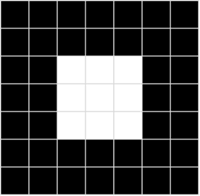

The array of pixel values for this image is two-dimensional (representing rows and columns, or x and y coordinates) and defines a single rectangle of pixel values. A single layer of pixel values like this represents a grayscale image. In reality, most digital images are multidimensional and consist of three layers (known as channels) that represent red, green, and blue (RGB) color hues. For example, we could represent a color image by defining three channels of pixel values that create the same square shape as the previous grayscale example:


In [ ]:
Red:
 150  150  150  150  150  150  150  
 150  150  150  150  150  150  150
 150  150  255  255  255  150  150
 150  150  255  255  255  150  150
 150  150  255  255  255  150  150
 150  150  150  150  150  150  150
 150  150  150  150  150  150  150

Green:
 0    0    0    0    0    0    0          
 0    0    0    0    0    0    0
 0    0   255  255  255   0    0
 0    0   255  255  255   0    0
 0    0   255  255  255   0    0
 0    0    0    0    0    0    0
 0    0    0    0    0    0    0

Blue:
 255  255  255  255  255  255  255  
 255  255  255  255  255  255  255
 255  255   0    0    0   255  255
 255  255   0    0    0   255  255
 255  255   0    0    0   255  255
 255  255  255  255  255  255  255
 255  255  255  255  255  255  255

Here's the resulting image:

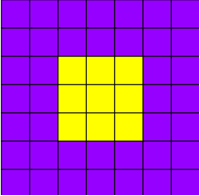

# Using filters to process images

A common way to perform image processing tasks is to apply filters that modify the pixel values of the image to create a visual effect. A filter is defined by one or more arrays of pixel values, called filter kernels. For example, you could define filter with a 3x3 kernel as shown in this example:

```code
-1 -1 -1
-1  8 -1
-1 -1 -1
```

The kernel is then convolved across the image, calculating a weighted sum for each 3x3 patch of pixels and assigning the result to a new image. It's easier to understand how the filtering works by exploring a step-by-step example.
Let's start with the grayscale image we explored previously:

```console
0   0   0   0   0   0   0  
0   0   0   0   0   0   0
0   0  255 255 255  0   0
0   0  255 255 255  0   0
0   0  255 255 255  0   0
0   0   0   0   0   0   0
0   0   0   0   0   0   0
```

First, we apply the filter kernel to the top left patch of the image, multiplying each pixel value by the corresponding weight value in the kernel and adding the results:

```console
(0 x -1) + (0 x -1) + (0 x -1) +
(0 x -1) + (0 x 8) + (0 x -1) +
(0 x -1) + (0 x -1) + (255 x -1) = -255
```

The result (-255) becomes the first value in a new array. Then we move the filter kernel along one pixel to the right and repeat the operation:

```console
(0 x -1) + (0 x -1) + (0 x -1) +
(0 x -1) + (0 x 8) + (0 x -1) +
(0 x -1) + (255 x -1) + (255 x -1) = -510
```

Again, the result is added to the new array, which now contains two values: 

```console
-255  -510
```

The process is repeated until the filter has been convolved across the entire image, as shown in this animation:

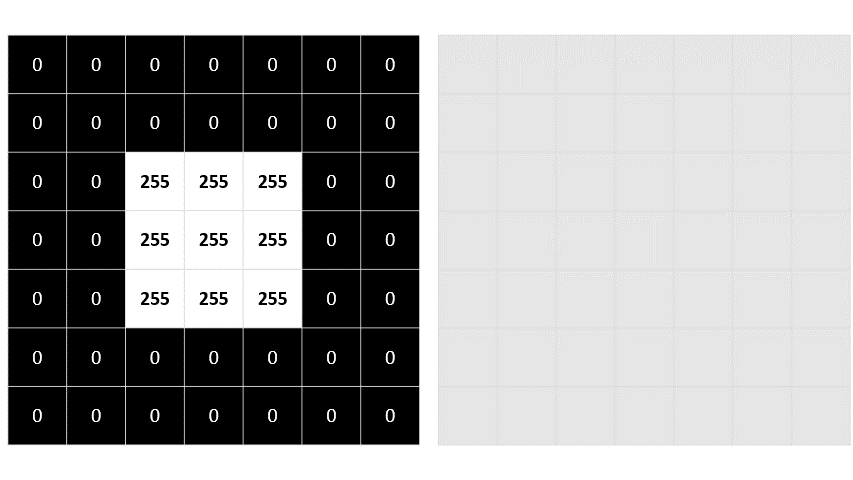

The filter is convolved across the image, calculating a new array of values. Some of the values might be outside of the 0 to 255 pixel value range, so the values are adjusted to fit into that range. Because of the shape of the filter, the outside edge of pixels isn't calculated, so a padding value (usually 0) is applied. The resulting array represents a new image in which the filter has transformed the original image. In this case, the filter has had the effect of highlighting the edges of shapes in the image.

To see the effect of the filter more clearly, here's an example of the same filter applied to a real image:

| Originial banana | Filtered banana |
| -- | -- |
| 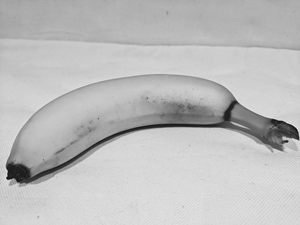|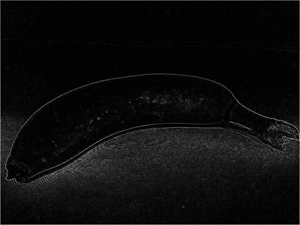 |

Because the filter is convolved across the image, this kind of image manipulation is often referred to as convolutional filtering. The filter used in this example is a particular type of filter (called a laplace filter) that highlights the edges on objects in an image. There are many other kinds of filter that you can use to create blurring, sharpening, color inversion, and other effects.


# Machine learning for computer vision

The ability to use filters to apply effects to images is useful in image processing tasks, such as you might perform with image editing software. However, the goal of computer vision is often to extract meaning, or at least actionable insights, from images; which requires the creation of machine learning models that are trained to recognize features based on large volumes of existing images.

## Convolutional neural networks (CNNs)

One of the most common machine learning model architectures for computer vision is a convolutional neural network (CNN). CNNs use filters to extract numeric feature maps from images, and then feed the feature values into a deep learning model to generate a label prediction. For example, in an image classification scenario, the label represents the main subject of the image (in other words, what is this an image of?). You might train a CNN model with images of different kinds of fruit (such as apple, banana, and orange) so that the label that is predicted is the type of fruit in a given image.

During the training process for a CNN, filter kernels are initially defined using randomly generated weight values. Then, as the training process progresses, the models predictions are evaluated against known label values, and the filter weights are adjusted to improve accuracy. Eventually, the trained fruit image classification model uses the filter weights that best extract features that help identify different kinds of fruit.
The following diagram illustrates how a CNN for an image classification model works:

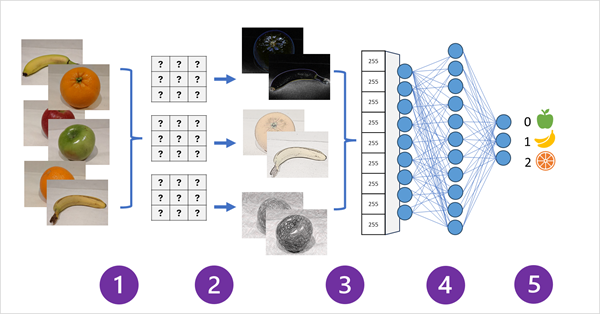

1. Images with known labels (for example, 0: apple, 1: banana, or 2: orange) are fed into the network to train the model.
2. One or more layers of filters is used to extract features from each image as it is fed through the network. The filter kernels start with randomly assigned weights and generate arrays of numeric values called feature maps.
3. The feature maps are flattened into a single dimensional array of feature values.
4. The feature values are fed into a fully connected neural network.
5. The output layer of the neural network uses a softmax or similar function to produce a result that contains a probability value for each possible class, for example [0.2, 0.5, 0.3].

During training the output probabilities are compared to the actual class label - for example, an image of a banana (class 1) should have the value [0.0, 1.0, 0.0]. The difference between the predicted and actual class scores is used to calculate the loss in the model, and the weights in the fully connected neural network and the filter kernels in the feature extraction layers are modified to reduce the loss.
The training process repeats over multiple epochs until an optimal set of weights has been learned. Then, the weights are saved and the model can be used to predict labels for new images for which the label is unknown.

<blockquote>CNN architectures usually include multiple convolutional filter layers and additional layers to reduce the size of feature maps, constrain the extracted values, and otherwise manipulate the feature values. These layers have been omitted in this simplified example to focus on the key concept, which is that filters are used to extract numeric features from images, which are then used in a neural network to predict image labels.</blockquote>

# Transformers and multi-modal models
CNNs have been at the core of computer vision solutions for many years. While they're commonly used to solve image classification problems as described previously, they're also the basis for more complex computer vision models. For example, object detection models combine CNN feature extraction layers with the identification of regions of interest in images to locate multiple classes of object in the same image.

## Transformers

Most advances in computer vision over the decades have been driven by improvements in CNN-based models. However, in another AI discipline - natural language processing (NLP), another type of neural network architecture, called a transformer has enabled the development of sophisticated models for language. Transformers work by processing huge volumes of data, and encoding language tokens (representing individual words or phrases) as vector-based embeddings (arrays of numeric values). You can think of an embedding as representing a set of dimensions that each represent some semantic attribute of the token. The embeddings are created such that tokens that are commonly used in the same context are closer together dimensionally than unrelated words.

As a simple example, the following diagram shows some words encoded as three-dimensional vectors, and plotted in a 3D space:

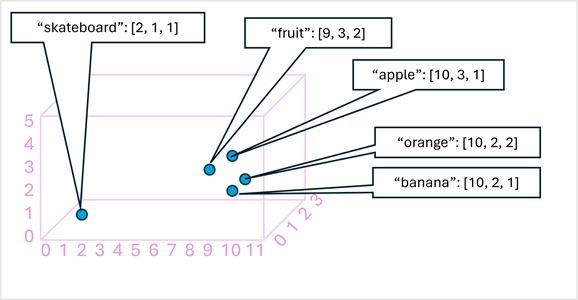

Tokens that are semantically similar are encoded in similar positions, creating a semantic language model that makes it possible to build sophisticated NLP solutions for text analysis, translation, language generation, and other tasks.

<blockquote>We've used only three dimensions, because that's easy to visualize. In reality, encoders in transformer networks create vectors with many more dimensions, defining complex semantic relationships between tokens based on linear algebraic calculations. The math involved is complex, as is the architecture of a transformer model. Our goal here is just to provide a conceptual understanding of how encoding creates a model that encapsulates relationships between entities.</blockquote>

## Multi-modal models
The success of transformers as a way to build language models has led AI researchers to consider whether the same approach would be effective for image data. The result is the development of multi-modal models, in which the model is trained using a large volume of captioned images, with no fixed labels. An image encoder extracts features from images based on pixel values and combines them with text embeddings created by a language encoder. The overall model encapsulates relationships between natural language token embeddings and image features, as shown here:

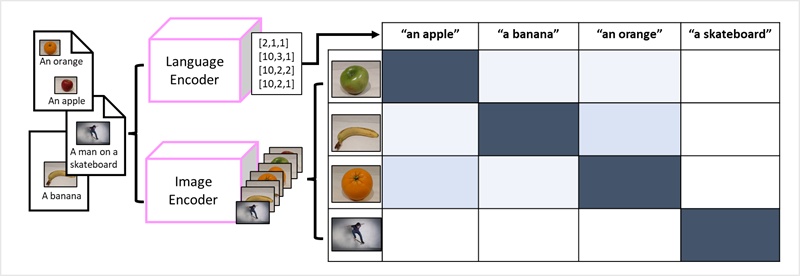

The Microsoft Florence model is just such a model. Trained with huge volumes of captioned images from the Internet, it includes both a language encoder and an image encoder. Florence is an example of a foundation model. In other words, a pre-trained general model on which you can build multiple adaptive models for specialist tasks. For example, you can use Florence as a foundation model for adaptive models that perform:

- Image classification: Identifying to which category an image belongs.
- Object detection: Locating individual objects within an image.
- Captioning: Generating appropriate descriptions of images.
- Tagging: Compiling a list of relevant text tags for an image.

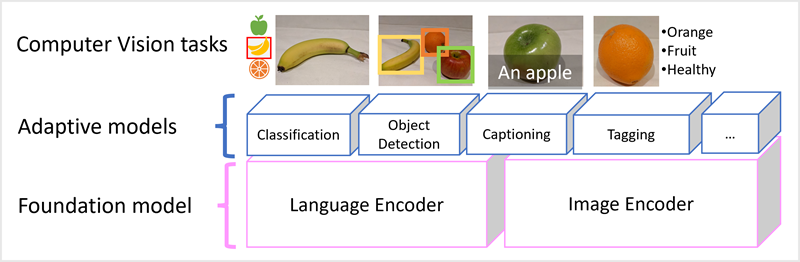

Multi-modal models like Florence are at the cutting edge of computer vision and AI in general, and are expected to drive advances in the kinds of solution that AI makes possible.


# Azure AI Vision

While you can train your own machine learning models for computer vision, the architecture for computer vision models can be complex; and you require significant volumes of training images and compute power to perform the training process.

Microsoft's Azure AI Vision service provides prebuilt and customizable computer vision models that are based on the Florence foundation model and provide various powerful capabilities. With Azure AI Vision, you can create sophisticated computer vision solutions quickly and easily; taking advantage of "off-the-shelf" functionality for many common computer vision scenarios, while retaining the ability to create custom models using your own images.

## Azure resources for Azure AI Vision service
To use Azure AI Vision, you need to create a resource for it in your Azure subscription. You can use either of the following resource types:

- Azure AI Vision: A specific resource for the Azure AI Vision service. Use this resource type if you don't intend to use any other Azure AI services, or if you want to track utilization and costs for your Azure AI Vision resource separately.
- Azure AI services: A general resource that includes Azure AI Vision along with many other Azure AI services; such as Azure AI Language, Azure AI Custom Vision, Azure AI Translator, and others. Use this resource type if you plan to use multiple AI services and want to simplify administration and development.

## Analyzing images with the Azure AI Vision service
After you've created a suitable resource in your subscription, you can submit images to the Azure AI Vision service to perform a wide range of analytical tasks.

Azure AI Vision supports multiple image analysis capabilities, including:

- Optical character recognition (OCR) - extracting text from images.
- Generating captions and descriptions of images.
- Detection of thousands of common objects in images.
- Tagging visual features in images

These tasks, and more, can be performed in Azure AI Vision Studio.


## Optical character recognition

Azure AI Vision service can use optical character recognition (OCR) capabilities to detect text in images. For example, consider the following image of a nutrition label on a product in a grocery store.
Diagram of a nutrition label.

## Describing an image with captions

Azure AI Vision has the ability to analyze an image, evaluate the objects that are detected, and generate a human-readable phrase or sentence that can describe what was detected in the image. For example, consider the following image:

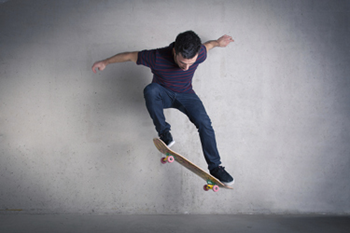

Azure AI Vision returns the following caption for this image:
A man jumping on a skateboard

## Detecting common objects in an image

Azure AI Vision can identify thousands of common objects in images. For example, when used to detect objects in the skateboarder image discussed previously, Azure AI Vision returns the following predictions:

- Skateboard (90.40%)
- Person (95.5%)

The predictions include a confidence score that indicates the probability the model has calculated for the predicted objects.
In addition to the detected object labels and their probabilities, Azure AI Vision returns bounding box coordinates that indicate the top, left, width, and height of the object detected. You can use these coordinates to determine where in the image each object was detected, like this:

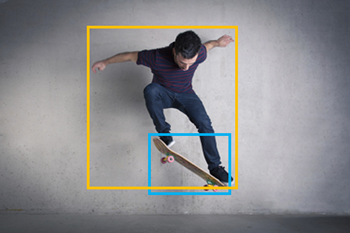

## Tagging visual features

Azure AI Vision can suggest tags for an image based on its contents. These tags can be associated with the image as metadata that summarizes attributes of the image and can be useful if you want to index an image along with a set of key terms that might be used to search for images with specific attributes or contents.

For example, the tags returned for the skateboarder image (with associated confidence scores) include:
- sport (99.60%)
- person (99.56%)
- footwear (98.05%)
- skating (96.27%)
- boardsport (95.58%)
- skateboarding equipment (94.43%)
- clothing (94.02%)
- wall (93.81%)
- skateboarding (93.78%)
- skateboarder (93.25%)
- individual sports (92.80%)
- street stunts (90.81%)
- balance (90.81%)
- jumping (89.87%)
- sports equipment (88.61%)
- extreme sport (88.35%)
- kickflip (88.18%)
- stunt (87.27%)
- skateboard (86.87%)
- stunt performer (85.83%)
- knee (85.30%)
- sports (85.24%)
- longboard (84.61%)
- longboarding (84.45%)
- riding (73.37%)
- skate (67.27%)
- air (64.83%)
- young (63.29%)
- outdoor (61.39%)

## Training custom models

If the built-in models provided by Azure AI Vision don't meet your needs, you can use the service to train a custom model for image classification or object detection. Azure AI Vision builds custom models on the pre-trained foundation model, meaning that you can train sophisticated models by using relatively few training images.

## Image classification

An image classification model is used to predict the category, or class of an image. For example, you could train a model to determine which type of fruit is shown in an image.

## Object detection

Object detection models detect and classify objects in an image, returning bounding box coordinates to locate each object. In addition to the built-in object detection capabilities in Azure AI Vision, you can train a custom object detection model with your own images. For example, you could use photographs of fruit to train a model that detects multiple fruits in an image.